> 시계열 분석을 정리하고자 한다. 시계열의 비선형 모델(TAR, STAR, Markov switching), 비모수 모델(kernel regression) 등에 대해 알아보자.

# TAR(Threshold Autoregressive)

TAR(Threshold Autoregressive) 모형은 시계열 데이터가 특정 임계값(threshold)에 따라 다른 선형 회귀 방정식을 따르는 경우에 적합한 비선형 모형이다. 이 모형은 데이터가 임계값을 기준으로 서로 다른 상태(regime)에 있을 때 유용하며, 각 상태에서는 데이터가 선형적으로 행동한다.

$$y_t = 
\begin{cases} 
\phi_{0,1} + \phi_{1,1} y_{t-1} + \cdots + \phi_{p,1} y_{t-p} + \epsilon_{t,1}, & \text{if } y_{t-d} \leq r \\
\phi_{0,2} + \phi_{1,2} y_{t-1} + \cdots + \phi_{p,2} y_{t-p} + \epsilon_{t,2}, & \text{if } y_{t-d} > r
\end{cases}$$

여기서 $y_{t-d}\leq r$과 $y_{t-d}>r$는 각각 다른 두 상태를 나타내고 $r$은 임계값, $d$는 lag시간, $\phi$는 모수

# STAR(Smooth Transition AR) Model

STAR 모형은 TAR 모형을 일반화한 것으로, 시계열 데이터가 두 상태 사이를 부드럽게 전환하는 경우에 적합하다. STAR 모형은 전환 함수(transition function)를 사용하여 두 상태 사이의 전환을 모델링한다. 전환은 보통 로지스틱 함수나 지수 함수를 사용하여 모델링되며, 이를 통해 시계열 데이터가 어떻게 두 상태 사이를 이동하는지 설명한다.

$$y_t = \phi_{0} + \left(\phi_{1} + \gamma G(s_t; c, \tau)\right) y_{t-1} + \cdots + \left(\phi_{p} + \gamma G(s_t; c, \tau)\right) y_{t-p} + \epsilon_t$$

$$G(s_t; c, \tau) = \frac{1}{1 + \exp\left(-\frac{s_t - c}{\tau}\right)}$$

$G(\cdot)$는 전환 함수로, 일반적으로 로지스틱 함수나 지수 함수가 사용된다. $s_t$는 전환 변수, $c$는 전화의 중심(임계값)을 나타내고, $\tau$는 전환의 폭(부드러움)을 조절하는 파라미터이다.

# Markov Switching Autoregression Model

마르코프 전환(Markov Switching) 모델은 시계열 데이터가 여러 상태(regime) 사이를 전환할 수 있으며, 각 상태에서의 동적 행동이 다를 수 있다고 가정하는 비선형 시계열 모델이다. 이 모델은 상태 전환 확률이 마르코프 체인(Markov Chain)에 의해 결정된다고 가정하며, 이는 시계열 데이터가 시간에 따라 서로 다른 통계적 속성을 가질 수 있음을 나타낸다.

$$y_t = \phi_{0,S_t} + \phi_{1,S_t} y_{t-1} + \cdots + \phi_{p,S_t} y_{t-p} + \epsilon_{t,S_t}$$

여기서, $S_t$는 시점 t에서의 상태를 나타내며, 1부터 $M$까지 정수값을 가진다.

상태 전환 확률은 마르코프 체인을 사용하여 모델링되며, 각 상태는 오직 바로 이전 시점의 상태에만 의존하는 특성을 가진다.

transition probability matrix (two regime 경우):

$$P = \begin{pmatrix}
p_{11} & p_{12} \\
p_{21} & p_{22}
\end{pmatrix}$$


여기서,
$p_{ij}$는 상태 $i$에서 상태 $j$로 전환될 확률을 나타낸다. 예를 들어, $p_{12}$는 상태 $S_1$에서 상태 $S_2$로 전환될 확률을 의미한다.

**1. Hamilton(1989)**

<Axes: title={'center': 'Growth rate of Real GNP'}, xlabel='date'>

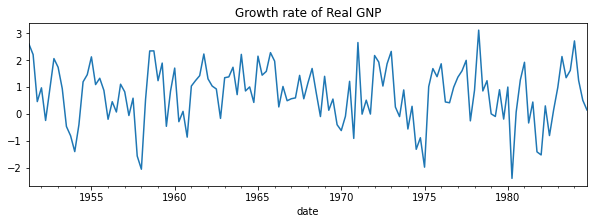

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

dta = pd.read_stata("data/rgnp.dta").iloc[1:]
dta.index = pd.DatetimeIndex(dta.date, freq="QS")
dta_hamilton = dta.rgnp

# Plot the data
dta_hamilton.plot(title="Growth rate of Real GNP", figsize=(10, 3))

In [66]:
# Fit the model
mod_hamilton = sm.tsa.MarkovAutoregression(
    dta_hamilton, k_regimes=2, order=4, switching_ar=False
)
res_hamilton = mod_hamilton.fit()
res_hamilton.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Markov Switching Model Results                         
================================================================================
Dep. Variable:                     rgnp   No. Observations:                  131
Model:             MarkovAutoregression   Log Likelihood                -181.263
Date:                  Fri, 12 Apr 2024   AIC                            380.527
Time:                          11:28:27   BIC                            406.404
Sample:                      04-01-1951   HQIC                           391.042
                           - 10-01-1984                                         
Covariance Type:                 approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3588      0.265     -1.356      0.175      -0.877       0.160
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1635      0.075     15.614      0.000       1.017       1.310
                           Non-switching parameters                           
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.5914      0.103      5.761      0.000       0.390       0.793
ar.L1          0.0135      0.120      0.112      0.911      -0.222       0.249
ar.L2         -0.0575      0.138     -0.418      0.676      -0.327       0.212
ar.L3         -0.2470      0.107     -2.310      0.021      -0.457      -0.037
ar.L4         -0.2129      0.111     -1.926      0.054      -0.430       0.004
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.7547      0.097      7.819      0.000       0.565       0.944
p[1->0]        0.0959      0.038      2.542      0.011       0.022       0.170
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

In [71]:
from pandas_datareader.data import DataReader
from datetime import datetime
usrec = DataReader(
    "USREC", "fred", start=datetime(1947, 1, 1), end=datetime(2013, 4, 1))

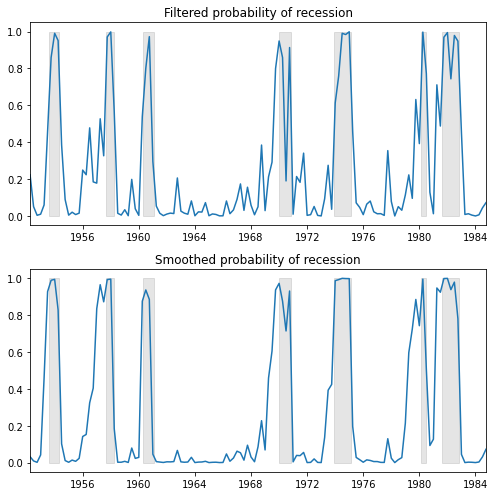

In [72]:
fig, axes = plt.subplots(2, figsize=(7, 7))
ax = axes[0]
ax.plot(res_hamilton.filtered_marginal_probabilities[0])
ax.fill_between(usrec.index, 0, 1, where=usrec["USREC"].values, color="k", alpha=0.1)
ax.set_xlim(dta_hamilton.index[4], dta_hamilton.index[-1])
ax.set(title="Filtered probability of recession")

ax = axes[1]
ax.plot(res_hamilton.smoothed_marginal_probabilities[0])
ax.fill_between(usrec.index, 0, 1, where=usrec["USREC"].values, color="k", alpha=0.1)
ax.set_xlim(dta_hamilton.index[4], dta_hamilton.index[-1])
ax.set(title="Smoothed probability of recession")

fig.tight_layout()

**2. Kim, Nelson, and Startz (1998)**

이번에는 분산에 대해 regime switching한다.

In [81]:
import yfinance as yf
df = yf.download('^GSPC', '2015-1-1','2024-1-1')

[*********************100%%**********************]  1 of 1 completed


In [82]:
ret = df.Close.pct_change().dropna()

In [83]:
# Fit the model
mod_kns = sm.tsa.MarkovRegression(
    ret, k_regimes=3, trend="n", switching_variance=True
)
res_kns = mod_kns.fit()
res_kns.summary()

C:\Users\master\anaconda3\envs\py38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\master\anaconda3\envs\py38\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:                  Close   No. Observations:                 2263
Model:               MarkovRegression   Log Likelihood                7499.478
Date:                Fri, 12 Apr 2024   AIC                         -14980.957
Time:                        11:35:31   BIC                         -14929.437
Sample:                             0   HQIC                        -14962.158
                               - 2263                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      3.039e-05   2.11e-06     14.414      0.000    2.63e-05    3.45e-05
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0002    1.2e-05     15.311      0.000       0.000       0.000
                             Regime 2 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0022      0.001      3.778      0.000       0.001       0.003
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.9781      0.005    191.007      0.000       0.968       0.988
p[1->0]        0.0302        nan        nan        nan         nan         nan
p[2->0]     1.578e-07        nan        nan        nan         nan         nan
p[0->1]        0.0206      0.005      4.068      0.000       0.011       0.030
p[1->1]        0.9698        nan        nan        nan         nan         nan
p[2->1]        0.0428      0.037      1.146      0.252      -0.030       0.116
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

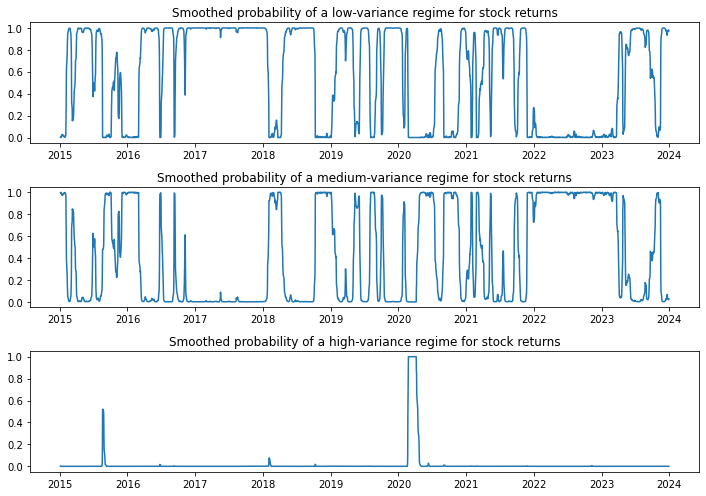

In [84]:
fig, axes = plt.subplots(3, figsize=(10, 7))

ax = axes[0]
ax.plot(res_kns.smoothed_marginal_probabilities[0])
ax.set(title="Smoothed probability of a low-variance regime for stock returns")

ax = axes[1]
ax.plot(res_kns.smoothed_marginal_probabilities[1])
ax.set(title="Smoothed probability of a medium-variance regime for stock returns")

ax = axes[2]
ax.plot(res_kns.smoothed_marginal_probabilities[2])
ax.set(title="Smoothed probability of a high-variance regime for stock returns")

fig.tight_layout()

# Non-parametric Model

## Kernel Regression
커널 회귀는 비모수 회귀의 일종으로, 주어진 데이터 포인트에 대해 가중 평균을 사용하여 응답 변수의 값을 예측한다. 가중치는 커널 함수를 통해 계산되며, 대상 지점에서의 거리에 따라 달라진다.

커널 회귀 분석의 추정식은 $Y = m(X)+\epsilon$에서 $m(X)$를 구하는 것과 같다.

Nadaraya-Wastson 추정식:

$$\hat{m}_h(x) = \frac{\sum^n_{i=1}K_h(x-x_i)y_i}{\sum^n_{i=1}K_h(x-x_i)}$$

여기서, $K_h(\cdot)$는 커널 함수이고, $h$는 대역폭(bandwidth)이다.

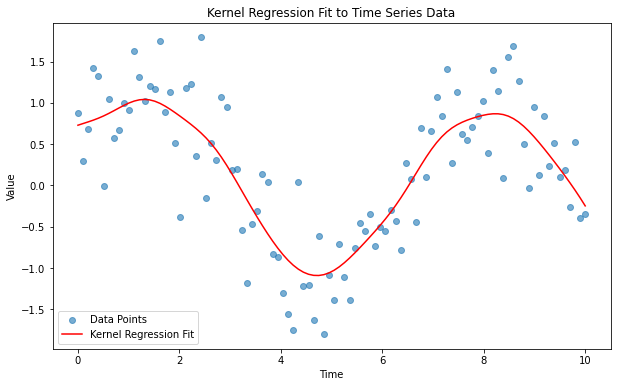

In [11]:
from statsmodels.nonparametric.kernel_regression import KernelReg

# 임의의 시계열 데이터 생성
np.random.seed(0)
x = np.linspace(0, 10, 100)
y = np.sin(x) + np.random.normal(0, 0.5, size=100)

# 커널 회귀 모델 생성 및 적합
kr = KernelReg(endog=y, exog=x, var_type='c')  # 'c'는 연속형 변수를 나타냄
y_fit, y_std = kr.fit(x)

# 원본 데이터와 적합 결과를 플로팅
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.6, label='Data Points')
plt.plot(x, y_fit, color='red', label='Kernel Regression Fit')
plt.title('Kernel Regression Fit to Time Series Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

## 머신러닝과 인공신경망 모델

- 머신러닝: Random Forest, Gradient Boosting, XGBoost
- 딥러닝: RNN, LSTM, Transformer 등
  
이에 대해서는 따로 포스트를 만들도록 하겠다.

# 참고 문헌

- Tsay, R. S. (2005). Analysis of financial time series. John wiley & sons.

- Statsmodels (https://www.statsmodels.org/)